In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install tensorflow-gpu==2.10.0

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam,SGD
import keras_tuner as kt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heartDT_Filtered.csv to heartDT_Filtered.csv


In [ ]:
df_heart=pd.read_csv('/content/heartDT_Filtered.csv')

In [ ]:
X=df_heart.drop('cardio',axis=1)
y=df_heart['cardio']

In [ ]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scalled=scaler.fit_transform(X_train)
X_test_scalled=scaler.transform(X_test)

In [ ]:
X_train_scalled

array([[-0.48880609, -0.73033689, -0.9479007 , ...,  4.2854031 ,
        -2.03418718,  0.20347066],
       [-1.96611837, -0.73033689,  2.62067582, ..., -0.23335028,
         0.49159684, -0.78212651],
       [ 0.39758127, -0.73033689, -0.56555322, ..., -0.23335028,
         0.49159684,  0.07314111],
       ...,
       [ 0.10211882, -0.73033689, -1.45769735, ..., -0.23335028,
         0.49159684,  0.91760628],
       [ 0.39758127, -0.73033689, -0.56555322, ..., -0.23335028,
         0.49159684, -0.76981164],
       [-0.48880609,  1.36923113,  1.34618421, ..., -0.23335028,
         0.49159684,  0.07720731]])

In [ ]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),activation=hp.Choice('activation',['relu','tanh','sigmoid']),
                  input_dim=X_train_scalled.shape[1]))
  model.add(Dropout(hp.Float('dropout_rate',min_value=0.1,max_value=0.5,step=0.1)))
  model.add(Dense(units=hp.Int('units2',min_value=32,max_value=256,step=32),activation=hp.Choice('activation2',['relu','tanh','sigmoid'])))
  model.add(Dropout(hp.Float('dropout_rate2',min_value=0.1,max_value=0.5,step=0.1)))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=Adam(hp.Choice('learning_rate',[0.001,0.01,0.1])),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=20,executions_per_trial=1,directory='project',project_name='heart_disease_soft_layer1')



Reloading Tuner from project/heart_disease_3/tuner0.json


In [ ]:
tuner.search(X_train_scalled,y_train,epochs=50,validation_split=0.2)


Trial 20 Complete [00h 06m 24s]
val_accuracy: 0.7260299921035767

Best val_accuracy So Far: 0.7356849312782288
Total elapsed time: 01h 40m 18s


In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
print(best_hps)

In [ ]:
print(best_hps.get('units'))

448


In [ ]:
print(best_hps.get('units2'))

96


In [ ]:
print(best_hps.get('learning_rate'))

0.001


In [ ]:
print(best_hps.get('dropout_rate'))

0.1


In [ ]:
print(best_hps.get('dropout_rate2'))

0.5


In [ ]:
print(f"")

In [ ]:
#build model with optimum parameters

In [ ]:
model_best=tuner.hypermodel.build(best_hps)

In [ ]:
history=model_best.fit(X_train_scalled,y_train,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
1308/1308 [==============================] - 10s 6ms/step - loss: 0.5666 - accuracy: 0.7211 - val_loss: 0.5552 - val_accuracy: 0.7291
Epoch 2/100
1308/1308 [==============================] - 5s 4ms/step - loss: 0.5578 - accuracy: 0.7278 - val_loss: 0.5528 - val_accuracy: 0.7281
Epoch 3/100
1308/1308 [==============================] - 5s 4ms/step - loss: 0.5546 - accuracy: 0.7292 - val_loss: 0.5505 - val_accuracy: 0.7305
Epoch 4/100
1308/1308 [==============================] - 6s 5ms/step - loss: 0.5544 - accuracy: 0.7295 - val_loss: 0.5491 - val_accuracy: 0.7310
Epoch 5/100
1308/1308 [==============================] - 5s 4ms/step - loss: 0.5518 - accuracy: 0.7294 - val_loss: 0.5488 - val_accuracy: 0.7284
Epoch 6/100
1308/1308 [==============================] - 6s 5ms/step - loss: 0.5519 - accuracy: 0.7295 - val_loss: 0.5508 - val_accuracy: 0.7321
Epoch 7/100
1308/1308 [==============================] - 5s 4ms/step - loss: 0.5514 - accuracy: 0.7300 - val_loss: 0.5473 - val_a

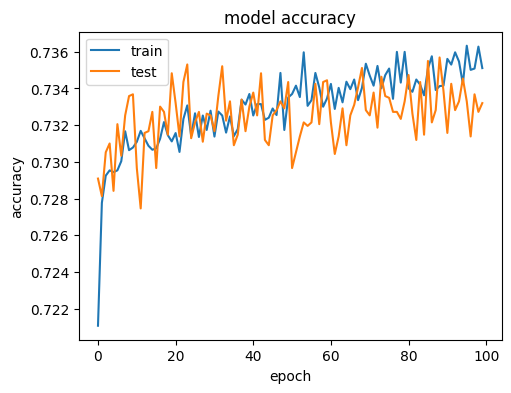

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
loss,accuracy=model_best.evaluate(X_test_scalled,y_test)

409/409 [==============================] - 3s 6ms/step - loss: 0.5488 - accuracy: 0.7311


In [ ]:
model_best.save('heart_disease_FINAL.h5')

In [ ]:

load_model=tf.keras.models.load_model('/content/heart_disease_FINAL.h5')

In [ ]:
y_pred=load_model.predict(X_test_scalled)
y_pred=(y_pred>0.5).astype(int)

409/409 [==============================] - 1s 2ms/step


In [ ]:
conf_matrix=sklearn.metrics.confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Actual')

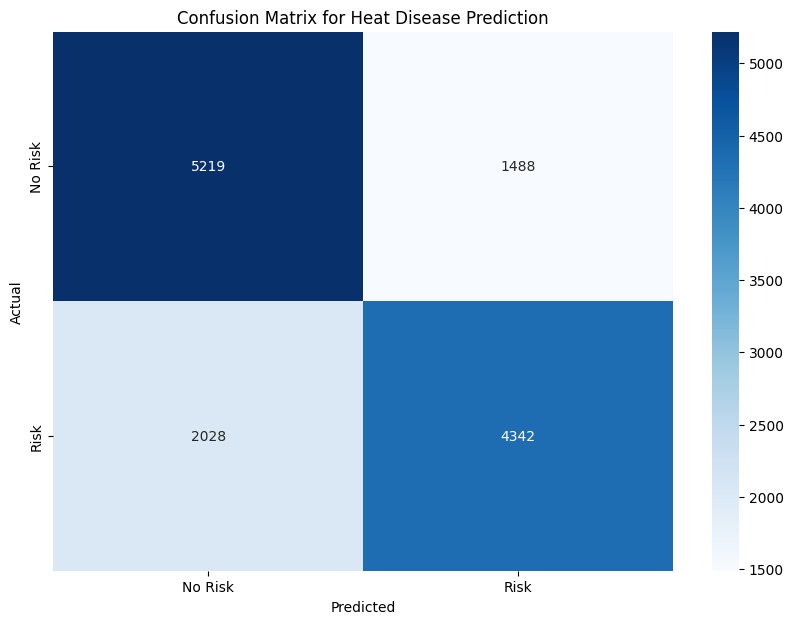

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['No Risk','Risk'],yticklabels=['No Risk','Risk'])
plt.title('Confusion Matrix for Heat Disease Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
classification_report=sklearn.metrics.classification_report(y_test,y_pred,target_names=['No Risk','Risk'])
print(classification_report)

              precision    recall  f1-score   support

     No Risk       0.72      0.78      0.75      6707
        Risk       0.74      0.68      0.71      6370

    accuracy                           0.73     13077
   macro avg       0.73      0.73      0.73     13077
weighted avg       0.73      0.73      0.73     13077



In [ ]:
from sklearn.metrics import roc_curve,auc

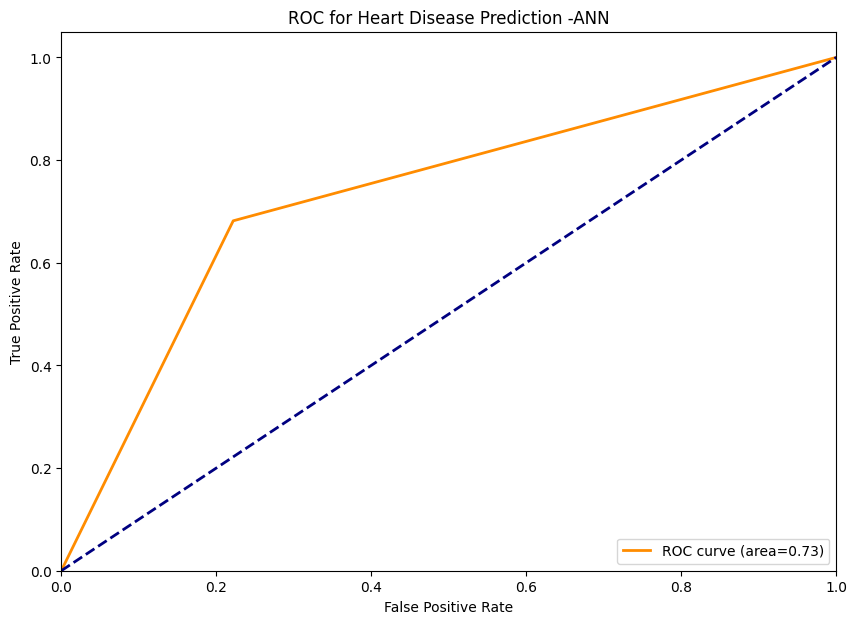

In [ ]:
fp,tp,_=roc_curve(y_test,y_pred)
roc_auc=auc(fp,tp)
plt.figure(figsize=(10,7))
plt.plot(fp,tp,color='darkorange',lw=2,label='ROC curve (area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Heart Disease Prediction -ANN')
plt.legend(loc='lower right')
